In [87]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Method Declaration

In [88]:
'''
Prints user distribution across a categorical column

Input: 

- user_distribution: pd.DataFrame(), with 2 columns:
    "user_percentage": percentage of users that belong in category, 
    "category": name of category
 
- category: str, name of the parent category

Output: 

barplot generated with matplotlib and seaborn

'''
def print_user_distribution(user_distribution: pd.DataFrame(), category: str):
    # set the plot style
    sns.set_style("whitegrid")

    # create the bar plot
    plt.figure(figsize=(8, 6))
    ax = sns.barplot(x="user_percentage", y="category", data=user_distribution, palette='Reds_d')

    # add labels and title
    plt.xlabel('Percentage of Users', fontsize=12)
    plt.ylabel('User Category', fontsize=12)
    plt.title(f'User Distribution by {category}', fontsize=14)

    # add percentages to the bars
    for p in ax.patches:
        width = p.get_width()
        plt.text(5 + p.get_width(), p.get_y() + 0.5 * p.get_height(), '{:.1f}%'.format(width), ha='left', va='center', fontsize=12)

    # remove the top and right spines
    sns.despine()

    # show the plot
    plt.show()
    

In [89]:
'''
Converts a series of type 'object' that contains timestamp data in utc 
to ns.datetime[64] type utc+2 (Europe/Athens)

Input: 

- timestamp_utc_series: string pd.Series

Output:

- timestamp_utc2_series: datetime[64] pd.Series

'''

def convert_string_series_timestamp_to_datetime_utc_plus_2(timestamp_utc_series: pd.Series) -> pd.Series:
    # Convert the timestamp Series to a Pandas DateTime object
    timestamp_dt_series = pd.to_datetime(timestamp_utc_series, utc=True)

    # Convert the timestamp Series to UTC+2 time zone
    timestamp_utc2_series = timestamp_dt_series.dt.tz_convert('Europe/Athens')

    return timestamp_utc2_series

'''
Extracts 'day', 'month','week', 'year', 'time', 'hour', 'day_of_week' information 
from a timestamp Series (of type datetime64[ns, Europe/Athens])
and creates the respective columns. 

Input: 

- pd.DataFrame,  with a timestamp column named order_timestamp (type datetime[64])

Output:

- pd.DataFrame
'''
def extract_timestamp_info(orders_df: pd.DataFrame) -> pd.DataFrame:
    orders_df['day'] = orders_df['order_timestamp'].dt.day
    orders_df['week'] = orders_df['order_timestamp'].dt.isocalendar().week
    orders_df['month'] = orders_df['order_timestamp'].dt.month
    orders_df['year'] = orders_df['order_timestamp'].dt.year
    orders_df['time'] = orders_df['order_timestamp'].dt.time
    orders_df['hour'] = orders_df['order_timestamp'].dt.hour
    orders_df['day_of_week'] = orders_df['order_timestamp'].dt.day_name()
    return orders_df




In [90]:
'''
Plots users distribution (in %) across 2 categorical data 'user_orders_category', 'avg_order_value_category'.

Input: 

- orders_per_category: pd.DataFrame(), contains x_axis, y_axis columns
- x_axis: name of categorical column to be put on x axis (default = 'user_orders_category')
- y_axis: name of categorical column to be put on y axis (default =  'user_percentage')
- hue: name of categorical column to color bars by (default =  'avg_order_value_category')

'''
def plot_user_segments(orders_per_category: pd.DataFrame(), x_axis= 'user_orders_category', y_axis= 'user_percentage', _hue = 'avg_order_value_category' ):
    # create a bar plot
    sns.set(style="whitegrid")
    g= sns.catplot(x= x_axis, y= y_axis, hue= _hue, data=orders_per_category, kind="bar", palette="muted", height=6, aspect=1.5, legend_out=True)


    plt.title('User Order History Segmented by Categories')
    plt.xlabel('Number of Orders')
    plt.ylabel('Percentage  of Users (%)')

    # add count of users information above each bar
    for ax in g.axes.flat:
        for p in ax.patches:
            ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()), ha='center', va='bottom')

    plt.show()

In [91]:
'''
Categorize data using k-mean algorithm

Input:

- features_df: pd.DataFrame(), containing the features you want to use

- n_clusers: number of clusters (default = 4)
- random_state:(default = 0)
- n_init: (default = 'auto)

Output:

- 'cluster' column (pd.Series)

'''
def run_k_means(features_df: pd.DataFrame(), n_clusers = 4, random_state = 0, n_init='auto' ):

    # standardize the features
    scaler = StandardScaler()
    features_std = scaler.fit_transform(features_df)

    # fit K-means clustering model with 4 clusters
    kmeans = KMeans(n_clusters= n_clusers, random_state=random_state, n_init=n_init)

    #predict the labels of clusters.
    label = kmeans.fit_predict(features_std)

   
    return label


## Part A

User segmantation based on *order frequency* & *order value*

In [92]:
# read orders file from local disk
orders_df = pd.read_csv('../Assessment exercise dataset - orders.csv')
orders_df.shape

(534270, 7)

In [93]:
# check data types
orders_df.dtypes

order_id             int64
user_id              int64
order_timestamp     object
city                object
cuisine             object
paid_cash             bool
amount             float64
dtype: object

In [94]:
orders_df

,order_id,user_id,order_timestamp,city,cuisine,paid_cash,amount
0,7322173742136,94223136441,2022-01-18 15:41:28 UTC,Αίγιο,Breakfast,True,3.6
1,7210978616924,204794985423,2022-01-02 17:50:50 UTC,Αγρίνιο,Breakfast,True,1.9
2,7221232906132,12703920390,2022-01-04 08:37:12 UTC,Αγρίνιο,Breakfast,True,1.7
3,7399605199800,673310109528,2022-01-31 11:33:05 UTC,Λιβαδειά,Breakfast,True,3.0
4,7264221279744,673310109528,2022-01-10 11:18:28 UTC,Λιβαδειά,Breakfast,True,3.0
...,...,...,...,...,...,...,...
534265,7383295241752,314285338626,2022-01-28 22:25:04 UTC,Αλεξανδρούπολη,Street food,True,11.9
534266,7383425578320,586121418057,2022-01-28 22:39:29 UTC,Αλεξανδρούπολη,Street food,True,9.9
534267,7364485291992,29082002418,2022-01-24 19:29:34 UTC,Αλεξανδρούπολη,Street food,True,15.1
534268,7231345759480,348528607896,2022-01-05 18:28:41 UTC,Αλεξανδρούπολη,Street food,True,14.7


In [95]:
# add a new column with the number of orders per user
orders_df = orders_df.assign(user_orders=orders_df.groupby('user_id')['order_id'].transform('count'))
orders_df

,order_id,user_id,order_timestamp,city,cuisine,paid_cash,amount,user_orders
0,7322173742136,94223136441,2022-01-18 15:41:28 UTC,Αίγιο,Breakfast,True,3.6,11
1,7210978616924,204794985423,2022-01-02 17:50:50 UTC,Αγρίνιο,Breakfast,True,1.9,7
2,7221232906132,12703920390,2022-01-04 08:37:12 UTC,Αγρίνιο,Breakfast,True,1.7,21
3,7399605199800,673310109528,2022-01-31 11:33:05 UTC,Λιβαδειά,Breakfast,True,3.0,8
4,7264221279744,673310109528,2022-01-10 11:18:28 UTC,Λιβαδειά,Breakfast,True,3.0,8
...,...,...,...,...,...,...,...,...
534265,7383295241752,314285338626,2022-01-28 22:25:04 UTC,Αλεξανδρούπολη,Street food,True,11.9,3
534266,7383425578320,586121418057,2022-01-28 22:39:29 UTC,Αλεξανδρούπολη,Street food,True,9.9,5
534267,7364485291992,29082002418,2022-01-24 19:29:34 UTC,Αλεξανδρούπολη,Street food,True,15.1,13
534268,7231345759480,348528607896,2022-01-05 18:28:41 UTC,Αλεξανδρούπολη,Street food,True,14.7,9


In [96]:
# add a new column with the sum of amount spent per user
orders_df = orders_df.assign(sum_user_amount=orders_df.groupby('user_id')['amount'].transform('sum'))
orders_df

,order_id,user_id,order_timestamp,city,cuisine,paid_cash,amount,user_orders,sum_user_amount
0,7322173742136,94223136441,2022-01-18 15:41:28 UTC,Αίγιο,Breakfast,True,3.6,11,103.60
1,7210978616924,204794985423,2022-01-02 17:50:50 UTC,Αγρίνιο,Breakfast,True,1.9,7,30.50
2,7221232906132,12703920390,2022-01-04 08:37:12 UTC,Αγρίνιο,Breakfast,True,1.7,21,35.70
3,7399605199800,673310109528,2022-01-31 11:33:05 UTC,Λιβαδειά,Breakfast,True,3.0,8,23.90
4,7264221279744,673310109528,2022-01-10 11:18:28 UTC,Λιβαδειά,Breakfast,True,3.0,8,23.90
...,...,...,...,...,...,...,...,...,...
534265,7383295241752,314285338626,2022-01-28 22:25:04 UTC,Αλεξανδρούπολη,Street food,True,11.9,3,50.50
534266,7383425578320,586121418057,2022-01-28 22:39:29 UTC,Αλεξανδρούπολη,Street food,True,9.9,5,47.80
534267,7364485291992,29082002418,2022-01-24 19:29:34 UTC,Αλεξανδρούπολη,Street food,True,15.1,13,185.40
534268,7231345759480,348528607896,2022-01-05 18:28:41 UTC,Αλεξανδρούπολη,Street food,True,14.7,9,104.60


In [97]:
# add a new column with the avg amount spent per order per user 
orders_df['avg_order_value'] = orders_df['sum_user_amount']/orders_df['user_orders']
orders_df

,order_id,user_id,order_timestamp,city,cuisine,paid_cash,amount,user_orders,sum_user_amount,avg_order_value
0,7322173742136,94223136441,2022-01-18 15:41:28 UTC,Αίγιο,Breakfast,True,3.6,11,103.60,9.418182
1,7210978616924,204794985423,2022-01-02 17:50:50 UTC,Αγρίνιο,Breakfast,True,1.9,7,30.50,4.357143
2,7221232906132,12703920390,2022-01-04 08:37:12 UTC,Αγρίνιο,Breakfast,True,1.7,21,35.70,1.700000
3,7399605199800,673310109528,2022-01-31 11:33:05 UTC,Λιβαδειά,Breakfast,True,3.0,8,23.90,2.987500
4,7264221279744,673310109528,2022-01-10 11:18:28 UTC,Λιβαδειά,Breakfast,True,3.0,8,23.90,2.987500
...,...,...,...,...,...,...,...,...,...,...
534265,7383295241752,314285338626,2022-01-28 22:25:04 UTC,Αλεξανδρούπολη,Street food,True,11.9,3,50.50,16.833333
534266,7383425578320,586121418057,2022-01-28 22:39:29 UTC,Αλεξανδρούπολη,Street food,True,9.9,5,47.80,9.560000
534267,7364485291992,29082002418,2022-01-24 19:29:34 UTC,Αλεξανδρούπολη,Street food,True,15.1,13,185.40,14.261538
534268,7231345759480,348528607896,2022-01-05 18:28:41 UTC,Αλεξανδρούπολη,Street food,True,14.7,9,104.60,11.622222


In [98]:
# user level 
unique_users_df = orders_df.drop_duplicates(subset=['user_id'], keep='first')
unique_users_df = unique_users_df[['user_id', 'user_orders', 'sum_user_amount', 'avg_order_value']]

# qa
assert unique_users_df[unique_users_df.duplicated(subset=['user_id'])].shape[0] == 0
unique_users_df

,user_id,user_orders,sum_user_amount,avg_order_value
0,94223136441,11,103.60,9.418182
1,204794985423,7,30.50,4.357143
2,12703920390,21,35.70,1.700000
3,673310109528,8,23.90,2.987500
5,212289897372,22,110.00,5.000000
...,...,...,...,...
534230,551306802291,1,10.35,10.350000
534234,74723220264,1,25.10,25.100000
534240,67756053414,1,17.80,17.800000
534253,181885879896,1,18.40,18.400000


In [99]:
# Basic descriptives
unique_users_count  = unique_users_df['user_id'].nunique()
unique_orders_count  = orders_df['order_id'].nunique()
total_amount_spent = round(orders_df['amount'].sum(), 2)
total_amount_spent_per_user = round(unique_users_df['sum_user_amount'].sum()/unique_users_count , 2)
avg_order_value  = round(orders_df['amount'].mean(), 2)
orders_per_customer = round(unique_orders_count / unique_users_count, 2)
cities = orders_df['city'].nunique()
cuisines = orders_df['cuisine'].nunique()

# print
print('Unique users: ', unique_users_count)
print('Unique orders: ', unique_orders_count)
print('Cities: ', cities)
print('Cuisines: ', cuisines)
print('Unique orders per customer: ', orders_per_customer )
print('Average value of order: ', avg_order_value )
print('Total amount spent: ', total_amount_spent)
print('Average total amount spent by user: ', total_amount_spent_per_user)


Unique users:  121943
Unique orders:  534270
Cities:  46
Cuisines:  4
Unique orders per customer:  4.38
Average value of order:  8.52
Total amount spent:  4553244.7
Average total amount spent by user:  37.34


In [100]:
# take a closer look
for column in ['user_orders', 'sum_user_amount', 'avg_order_value']:
    print(f'\n{column} basic descriptives: ')
    print(unique_users_df[column].describe())


user_orders basic descriptives: 
count    121943.000000
mean          4.381309
std           5.443188
min           1.000000
25%           1.000000
50%           2.000000
75%           5.000000
max         135.000000
Name: user_orders, dtype: float64

sum_user_amount basic descriptives: 
count    121943.000000
mean         37.339123
std          41.786941
min           0.400000
25%          11.600000
50%          23.300000
75%          47.300000
max        1351.500000
Name: sum_user_amount, dtype: float64

avg_order_value basic descriptives: 
count    121943.000000
mean          9.953791
std           5.950652
min           0.400000
25%           6.000000
50%           8.500000
75%          12.300000
max         204.800000
Name: avg_order_value, dtype: float64


In [101]:
# segment users based on their order history metrics
unique_users_df['user_orders_category'] = pd.cut(unique_users_df['user_orders'], bins=[0, 2, 5, 1000], labels=['1-2 orders', '3-5 orders', '5+ orders'])
unique_users_df['avg_order_value_category'] = pd.cut(unique_users_df['avg_order_value'], bins=[0, 5, 10, 15, 1000], labels=['<= $5', '($5-$10]', '($10-$15]', '>$15'])

unique_users_df

,user_id,user_orders,sum_user_amount,avg_order_value,user_orders_category,avg_order_value_category
0,94223136441,11,103.60,9.418182,5+ orders,($5-$10]
1,204794985423,7,30.50,4.357143,5+ orders,<= $5
2,12703920390,21,35.70,1.700000,5+ orders,<= $5
3,673310109528,8,23.90,2.987500,5+ orders,<= $5
5,212289897372,22,110.00,5.000000,5+ orders,<= $5
...,...,...,...,...,...,...
534230,551306802291,1,10.35,10.350000,1-2 orders,($10-$15]
534234,74723220264,1,25.10,25.100000,1-2 orders,>$15
534240,67756053414,1,17.80,17.800000,1-2 orders,>$15
534253,181885879896,1,18.40,18.400000,1-2 orders,>$15


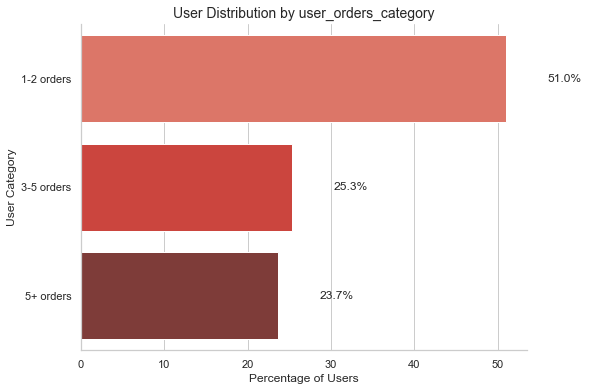

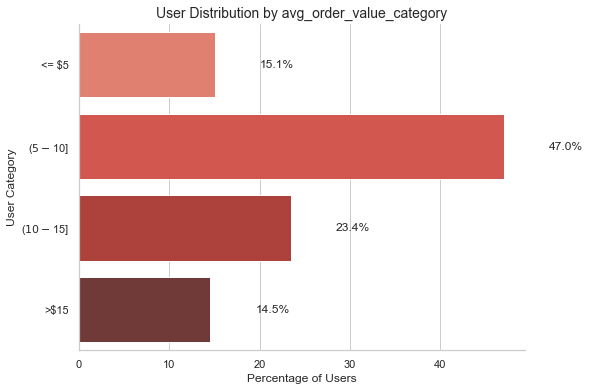

In [102]:
# plot distribution 
for column in ['user_orders_category','avg_order_value_category']:
    user_distribution = unique_users_df[column].value_counts().rename_axis('category').reset_index(name='user_counts')
    user_distribution['user_percentage'] = round(user_distribution['user_counts'] / unique_users_count * 100, 2)
    user_distribution = user_distribution.sort_values(by=['user_percentage'], ascending=False).reset_index(drop=True)
    print_user_distribution(user_distribution, column)
    
   

Order-wise:

- half of users have made 1-2 orders
- the other 2 groups share the rest 50% of users

we can categorize users in:
- frequent (5+ orders)
- semi-frequent (3-5 orders)
n- ewbies (1-2 orders)

Price-wise:

- Almost half of users spent 5+ to 10 Euros per order


we can categorize users in:
- low spenders (<= 5 eur)
- average spenders (5 to 10 eur)
- average-high spenders (10 to 15 eur)
- high spenders (over 15 eur)

Let's combine these 2 categories to further categorize users


In [103]:
# group users by the resulting categories
orders_per_category = unique_users_df.groupby(['user_orders_category', 'avg_order_value_category'])['user_id'].count().reset_index(name='count')

# find total users count &  total users % for each group 
orders_per_category['total_users'] = orders_per_category['count'].sum()
orders_per_category['user_percentage'] = orders_per_category['count'] / orders_per_category['total_users'] * 100


In [104]:
assert round(orders_per_category['user_percentage'].sum(), 1) == 100.0

In [105]:
print('Total User Segments: ' , orders_per_category.shape[0])
print('Average order value: ', avg_order_value)
print('Avg Orders per customer: ', orders_per_customer)


Total User Segments:  12
Average order value:  8.52
Avg Orders per customer:  4.38


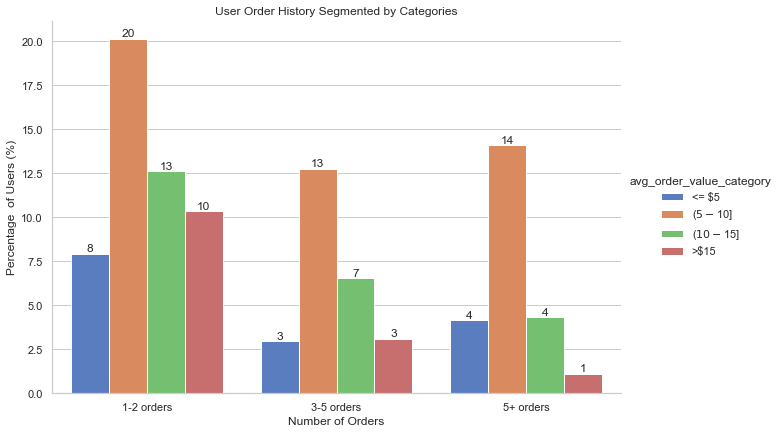

In [106]:
# plot 
plot_user_segments(orders_per_category=orders_per_category)


- users prefer to spend 5 to 10 euros per order on average regardless of order frequency
- the majority of frequent users are average spenders
- semi-frequent users seem spend more on average than  frequent users
- newbies spend more per order than any other group


In [107]:
# concat categorical data to orders_df
orders_df = orders_df.merge(unique_users_df[['user_id', 'user_orders_category', 'avg_order_value_category']], how='left', on='user_id')

orders_df

,order_id,user_id,order_timestamp,city,cuisine,paid_cash,amount,user_orders,sum_user_amount,avg_order_value,user_orders_category,avg_order_value_category
0,7322173742136,94223136441,2022-01-18 15:41:28 UTC,Αίγιο,Breakfast,True,3.6,11,103.60,9.418182,5+ orders,($5-$10]
1,7210978616924,204794985423,2022-01-02 17:50:50 UTC,Αγρίνιο,Breakfast,True,1.9,7,30.50,4.357143,5+ orders,<= $5
2,7221232906132,12703920390,2022-01-04 08:37:12 UTC,Αγρίνιο,Breakfast,True,1.7,21,35.70,1.700000,5+ orders,<= $5
3,7399605199800,673310109528,2022-01-31 11:33:05 UTC,Λιβαδειά,Breakfast,True,3.0,8,23.90,2.987500,5+ orders,<= $5
4,7264221279744,673310109528,2022-01-10 11:18:28 UTC,Λιβαδειά,Breakfast,True,3.0,8,23.90,2.987500,5+ orders,<= $5
...,...,...,...,...,...,...,...,...,...,...,...,...
534265,7383295241752,314285338626,2022-01-28 22:25:04 UTC,Αλεξανδρούπολη,Street food,True,11.9,3,50.50,16.833333,3-5 orders,>$15
534266,7383425578320,586121418057,2022-01-28 22:39:29 UTC,Αλεξανδρούπολη,Street food,True,9.9,5,47.80,9.560000,3-5 orders,($5-$10]
534267,7364485291992,29082002418,2022-01-24 19:29:34 UTC,Αλεξανδρούπολη,Street food,True,15.1,13,185.40,14.261538,5+ orders,($10-$15]
534268,7231345759480,348528607896,2022-01-05 18:28:41 UTC,Αλεξανδρούπολη,Street food,True,14.7,9,104.60,11.622222,5+ orders,($10-$15]


In [108]:
# avg value per order for each group 
orders_df.groupby('user_orders_category')['amount'].mean().reset_index()

,user_orders_category,amount
0,1-2 orders,10.856215
1,3-5 orders,9.638306
2,5+ orders,7.548421


In [109]:
# create a categorical concated key
orders_df['user_category_multi_key'] = orders_df['user_orders_category'].astype(str) + '__' + orders_df['avg_order_value_category'].astype(str)

# avg value per order for each group 
orders_df.groupby('user_category_multi_key')['amount'].mean().reset_index()

,user_category_multi_key,amount
0,1-2 orders__($10-$15],12.353300
1,1-2 orders__($5-$10],7.448117
2,1-2 orders__<= $5,3.928666
3,1-2 orders__>$15,21.282304
4,3-5 orders__($10-$15],12.087428
5,3-5 orders__($5-$10],7.435081
6,3-5 orders__<= $5,3.968577
7,3-5 orders__>$15,19.295479
8,5+ orders__($10-$15],11.842886
9,5+ orders__($5-$10],7.140198


## Part B
For this part we need to take in account more variables than order frequency and order value. 
Information such as cuisine & order timestamp are really useful in segmenting users more accurately.

In [110]:
orders_df

,order_id,user_id,order_timestamp,city,cuisine,paid_cash,amount,user_orders,sum_user_amount,avg_order_value,user_orders_category,avg_order_value_category,user_category_multi_key
0,7322173742136,94223136441,2022-01-18 15:41:28 UTC,Αίγιο,Breakfast,True,3.6,11,103.60,9.418182,5+ orders,($5-$10],5+ orders__($5-$10]
1,7210978616924,204794985423,2022-01-02 17:50:50 UTC,Αγρίνιο,Breakfast,True,1.9,7,30.50,4.357143,5+ orders,<= $5,5+ orders__<= $5
2,7221232906132,12703920390,2022-01-04 08:37:12 UTC,Αγρίνιο,Breakfast,True,1.7,21,35.70,1.700000,5+ orders,<= $5,5+ orders__<= $5
3,7399605199800,673310109528,2022-01-31 11:33:05 UTC,Λιβαδειά,Breakfast,True,3.0,8,23.90,2.987500,5+ orders,<= $5,5+ orders__<= $5
4,7264221279744,673310109528,2022-01-10 11:18:28 UTC,Λιβαδειά,Breakfast,True,3.0,8,23.90,2.987500,5+ orders,<= $5,5+ orders__<= $5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
534265,7383295241752,314285338626,2022-01-28 22:25:04 UTC,Αλεξανδρούπολη,Street food,True,11.9,3,50.50,16.833333,3-5 orders,>$15,3-5 orders__>$15
534266,7383425578320,586121418057,2022-01-28 22:39:29 UTC,Αλεξανδρούπολη,Street food,True,9.9,5,47.80,9.560000,3-5 orders,($5-$10],3-5 orders__($5-$10]
534267,7364485291992,29082002418,2022-01-24 19:29:34 UTC,Αλεξανδρούπολη,Street food,True,15.1,13,185.40,14.261538,5+ orders,($10-$15],5+ orders__($10-$15]
534268,7231345759480,348528607896,2022-01-05 18:28:41 UTC,Αλεξανδρούπολη,Street food,True,14.7,9,104.60,11.622222,5+ orders,($10-$15],5+ orders__($10-$15]


In [111]:
# total breakfast orders
orders_df['total_breakfast_orders'] = orders_df[orders_df['cuisine'] == 'Breakfast'].shape[0]

# breakfast orders % of total 
orders_df['total_breakfast_orders_prc'] = orders_df['total_breakfast_orders'] / orders_df.shape[0]


orders_df

,order_id,user_id,order_timestamp,city,cuisine,paid_cash,amount,user_orders,sum_user_amount,avg_order_value,user_orders_category,avg_order_value_category,user_category_multi_key,total_breakfast_orders,total_breakfast_orders_prc
0,7322173742136,94223136441,2022-01-18 15:41:28 UTC,Αίγιο,Breakfast,True,3.6,11,103.60,9.418182,5+ orders,($5-$10],5+ orders__($5-$10],207963,0.389247
1,7210978616924,204794985423,2022-01-02 17:50:50 UTC,Αγρίνιο,Breakfast,True,1.9,7,30.50,4.357143,5+ orders,<= $5,5+ orders__<= $5,207963,0.389247
2,7221232906132,12703920390,2022-01-04 08:37:12 UTC,Αγρίνιο,Breakfast,True,1.7,21,35.70,1.700000,5+ orders,<= $5,5+ orders__<= $5,207963,0.389247
3,7399605199800,673310109528,2022-01-31 11:33:05 UTC,Λιβαδειά,Breakfast,True,3.0,8,23.90,2.987500,5+ orders,<= $5,5+ orders__<= $5,207963,0.389247
4,7264221279744,673310109528,2022-01-10 11:18:28 UTC,Λιβαδειά,Breakfast,True,3.0,8,23.90,2.987500,5+ orders,<= $5,5+ orders__<= $5,207963,0.389247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534265,7383295241752,314285338626,2022-01-28 22:25:04 UTC,Αλεξανδρούπολη,Street food,True,11.9,3,50.50,16.833333,3-5 orders,>$15,3-5 orders__>$15,207963,0.389247
534266,7383425578320,586121418057,2022-01-28 22:39:29 UTC,Αλεξανδρούπολη,Street food,True,9.9,5,47.80,9.560000,3-5 orders,($5-$10],3-5 orders__($5-$10],207963,0.389247
534267,7364485291992,29082002418,2022-01-24 19:29:34 UTC,Αλεξανδρούπολη,Street food,True,15.1,13,185.40,14.261538,5+ orders,($10-$15],5+ orders__($10-$15],207963,0.389247
534268,7231345759480,348528607896,2022-01-05 18:28:41 UTC,Αλεξανδρούπολη,Street food,True,14.7,9,104.60,11.622222,5+ orders,($10-$15],5+ orders__($10-$15],207963,0.389247


In [112]:
print('Total breakfast orders: ', orders_df.iloc[0,10])
print('Total breakfast order prc: ', orders_df.iloc[0,11])

Total breakfast orders:  5+ orders
Total breakfast order prc:  ($5-$10]


In [113]:
# cuisine overview
orders_df['cuisine'].value_counts()

Breakfast      207963
Meat           183323
Italian         90777
Street food     52207
Name: cuisine, dtype: int64

In [114]:
# convert timestamp column to datetime utc+2
orders_df['order_timestamp'] = convert_string_series_timestamp_to_datetime_utc_plus_2(orders_df['order_timestamp'])
orders_df.dtypes

order_id                                              int64
user_id                                               int64
order_timestamp               datetime64[ns, Europe/Athens]
city                                                 object
cuisine                                              object
paid_cash                                              bool
amount                                              float64
user_orders                                           int64
sum_user_amount                                     float64
avg_order_value                                     float64
user_orders_category                               category
avg_order_value_category                           category
user_category_multi_key                              object
total_breakfast_orders                                int64
total_breakfast_orders_prc                          float64
dtype: object

In [115]:
orders_df = extract_timestamp_info(orders_df)
orders_df

,order_id,user_id,order_timestamp,city,cuisine,paid_cash,amount,user_orders,sum_user_amount,avg_order_value,...,user_category_multi_key,total_breakfast_orders,total_breakfast_orders_prc,day,week,month,year,time,hour,day_of_week
0,7322173742136,94223136441,2022-01-18 17:41:28+02:00,Αίγιο,Breakfast,True,3.6,11,103.60,9.418182,...,5+ orders__($5-$10],207963,0.389247,18,3,1,2022,17:41:28,17,Tuesday
1,7210978616924,204794985423,2022-01-02 19:50:50+02:00,Αγρίνιο,Breakfast,True,1.9,7,30.50,4.357143,...,5+ orders__<= $5,207963,0.389247,2,52,1,2022,19:50:50,19,Sunday
2,7221232906132,12703920390,2022-01-04 10:37:12+02:00,Αγρίνιο,Breakfast,True,1.7,21,35.70,1.700000,...,5+ orders__<= $5,207963,0.389247,4,1,1,2022,10:37:12,10,Tuesday
3,7399605199800,673310109528,2022-01-31 13:33:05+02:00,Λιβαδειά,Breakfast,True,3.0,8,23.90,2.987500,...,5+ orders__<= $5,207963,0.389247,31,5,1,2022,13:33:05,13,Monday
4,7264221279744,673310109528,2022-01-10 13:18:28+02:00,Λιβαδειά,Breakfast,True,3.0,8,23.90,2.987500,...,5+ orders__<= $5,207963,0.389247,10,2,1,2022,13:18:28,13,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534265,7383295241752,314285338626,2022-01-29 00:25:04+02:00,Αλεξανδρούπολη,Street food,True,11.9,3,50.50,16.833333,...,3-5 orders__>$15,207963,0.389247,29,4,1,2022,00:25:04,0,Saturday
534266,7383425578320,586121418057,2022-01-29 00:39:29+02:00,Αλεξανδρούπολη,Street food,True,9.9,5,47.80,9.560000,...,3-5 orders__($5-$10],207963,0.389247,29,4,1,2022,00:39:29,0,Saturday
534267,7364485291992,29082002418,2022-01-24 21:29:34+02:00,Αλεξανδρούπολη,Street food,True,15.1,13,185.40,14.261538,...,5+ orders__($10-$15],207963,0.389247,24,4,1,2022,21:29:34,21,Monday
534268,7231345759480,348528607896,2022-01-05 20:28:41+02:00,Αλεξανδρούπολη,Street food,True,14.7,9,104.60,11.622222,...,5+ orders__($10-$15],207963,0.389247,5,1,1,2022,20:28:41,20,Wednesday


In [116]:
# Let's add 'has_ordered_breakfast' info for users 
# To do that let's first compose a list of unique cuisines each user has ordered
user_cuisine_list = orders_df.groupby(['user_id'])['cuisine'].apply(lambda x: list(np.unique(x))).reset_index()

# rename
user_cuisine_list.rename(columns={'cuisine': 'user_cuisine_list_ordered'}, inplace=True)

# merge 
orders_df = orders_df.merge(user_cuisine_list[['user_id', 'user_cuisine_list_ordered']], how='left', on='user_id')

orders_df


,order_id,user_id,order_timestamp,city,cuisine,paid_cash,amount,user_orders,sum_user_amount,avg_order_value,...,total_breakfast_orders,total_breakfast_orders_prc,day,week,month,year,time,hour,day_of_week,user_cuisine_list_ordered
0,7322173742136,94223136441,2022-01-18 17:41:28+02:00,Αίγιο,Breakfast,True,3.6,11,103.60,9.418182,...,207963,0.389247,18,3,1,2022,17:41:28,17,Tuesday,"[Breakfast, Italian, Meat]"
1,7210978616924,204794985423,2022-01-02 19:50:50+02:00,Αγρίνιο,Breakfast,True,1.9,7,30.50,4.357143,...,207963,0.389247,2,52,1,2022,19:50:50,19,Sunday,"[Breakfast, Meat]"
2,7221232906132,12703920390,2022-01-04 10:37:12+02:00,Αγρίνιο,Breakfast,True,1.7,21,35.70,1.700000,...,207963,0.389247,4,1,1,2022,10:37:12,10,Tuesday,[Breakfast]
3,7399605199800,673310109528,2022-01-31 13:33:05+02:00,Λιβαδειά,Breakfast,True,3.0,8,23.90,2.987500,...,207963,0.389247,31,5,1,2022,13:33:05,13,Monday,[Breakfast]
4,7264221279744,673310109528,2022-01-10 13:18:28+02:00,Λιβαδειά,Breakfast,True,3.0,8,23.90,2.987500,...,207963,0.389247,10,2,1,2022,13:18:28,13,Monday,[Breakfast]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534265,7383295241752,314285338626,2022-01-29 00:25:04+02:00,Αλεξανδρούπολη,Street food,True,11.9,3,50.50,16.833333,...,207963,0.389247,29,4,1,2022,00:25:04,0,Saturday,[Street food]
534266,7383425578320,586121418057,2022-01-29 00:39:29+02:00,Αλεξανδρούπολη,Street food,True,9.9,5,47.80,9.560000,...,207963,0.389247,29,4,1,2022,00:39:29,0,Saturday,"[Italian, Street food]"
534267,7364485291992,29082002418,2022-01-24 21:29:34+02:00,Αλεξανδρούπολη,Street food,True,15.1,13,185.40,14.261538,...,207963,0.389247,24,4,1,2022,21:29:34,21,Monday,"[Italian, Meat, Street food]"
534268,7231345759480,348528607896,2022-01-05 20:28:41+02:00,Αλεξανδρούπολη,Street food,True,14.7,9,104.60,11.622222,...,207963,0.389247,5,1,1,2022,20:28:41,20,Wednesday,"[Italian, Street food]"


In [117]:
# Let's add 'has_ordered_breakfast' info for users 
orders_df['has_ordered_breakfast'] = np.where(orders_df.user_cuisine_list_ordered.apply(lambda x: 'Breakfast' in x), True, False)

orders_df

,order_id,user_id,order_timestamp,city,cuisine,paid_cash,amount,user_orders,sum_user_amount,avg_order_value,...,total_breakfast_orders_prc,day,week,month,year,time,hour,day_of_week,user_cuisine_list_ordered,has_ordered_breakfast
0,7322173742136,94223136441,2022-01-18 17:41:28+02:00,Αίγιο,Breakfast,True,3.6,11,103.60,9.418182,...,0.389247,18,3,1,2022,17:41:28,17,Tuesday,"[Breakfast, Italian, Meat]",True
1,7210978616924,204794985423,2022-01-02 19:50:50+02:00,Αγρίνιο,Breakfast,True,1.9,7,30.50,4.357143,...,0.389247,2,52,1,2022,19:50:50,19,Sunday,"[Breakfast, Meat]",True
2,7221232906132,12703920390,2022-01-04 10:37:12+02:00,Αγρίνιο,Breakfast,True,1.7,21,35.70,1.700000,...,0.389247,4,1,1,2022,10:37:12,10,Tuesday,[Breakfast],True
3,7399605199800,673310109528,2022-01-31 13:33:05+02:00,Λιβαδειά,Breakfast,True,3.0,8,23.90,2.987500,...,0.389247,31,5,1,2022,13:33:05,13,Monday,[Breakfast],True
4,7264221279744,673310109528,2022-01-10 13:18:28+02:00,Λιβαδειά,Breakfast,True,3.0,8,23.90,2.987500,...,0.389247,10,2,1,2022,13:18:28,13,Monday,[Breakfast],True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534265,7383295241752,314285338626,2022-01-29 00:25:04+02:00,Αλεξανδρούπολη,Street food,True,11.9,3,50.50,16.833333,...,0.389247,29,4,1,2022,00:25:04,0,Saturday,[Street food],False
534266,7383425578320,586121418057,2022-01-29 00:39:29+02:00,Αλεξανδρούπολη,Street food,True,9.9,5,47.80,9.560000,...,0.389247,29,4,1,2022,00:39:29,0,Saturday,"[Italian, Street food]",False
534267,7364485291992,29082002418,2022-01-24 21:29:34+02:00,Αλεξανδρούπολη,Street food,True,15.1,13,185.40,14.261538,...,0.389247,24,4,1,2022,21:29:34,21,Monday,"[Italian, Meat, Street food]",False
534268,7231345759480,348528607896,2022-01-05 20:28:41+02:00,Αλεξανδρούπολη,Street food,True,14.7,9,104.60,11.622222,...,0.389247,5,1,1,2022,20:28:41,20,Wednesday,"[Italian, Street food]",False


In [118]:
# focus on breakfast related users/orders
has_ordered_breakfast_df = orders_df[(orders_df['has_ordered_breakfast'] == True) & (orders_df['cuisine'] == 'Breakfast')]
has_ordered_breakfast_users_df = has_ordered_breakfast_df.drop_duplicates(subset='user_id', keep='first')
has_ordered_breakfast_user_count = has_ordered_breakfast_users_df.shape[0]

#  breakfast orders
breakfast_orders_df = orders_df[orders_df['cuisine'] == 'Breakfast']

In [119]:
# calculate breakfast metrics
average_breakfast_order_value  = round(breakfast_orders_df['amount'].mean())
breakfast_users_freq = round((has_ordered_breakfast_user_count/ unique_users_count), 2)
breakfast_users_to_breakfast_orders = round((breakfast_orders_df.shape[0]/has_ordered_breakfast_user_count), 2)

# print
print('Total Users that have ordered Breakfast at least once: ', has_ordered_breakfast_user_count)
print('Percentage of Total Users that have ordered Breakfast at least once: ', breakfast_users_freq )
print('Average Breakfast order value: ', average_breakfast_order_value)
print('Breakfast orders to breakfast users: ', breakfast_users_to_breakfast_orders)

Total Users that have ordered Breakfast at least once:  55834
Percentage of Total Users that have ordered Breakfast at least once:  0.46
Average Breakfast order value:  5
Breakfast orders to breakfast users:  3.72


In [120]:
# analyze cuisines per user
user_cuisine_frequency = orders_df.groupby(['user_id'])['cuisine'].value_counts().reset_index(name='frequency')
user_cuisine_frequency['total_orders'] = user_cuisine_frequency.groupby(['user_id'])['frequency'].transform('sum')
user_cuisine_frequency['cuisine_order_freq'] = user_cuisine_frequency['frequency'] / user_cuisine_frequency['total_orders']

user_cuisine_frequency

,user_id,cuisine,frequency,total_orders,cuisine_order_freq
0,44118921,Meat,1,1,1.000000
1,108938802,Meat,3,3,1.000000
2,110361993,Italian,4,11,0.363636
3,110361993,Meat,3,11,0.272727
4,110361993,Street food,3,11,0.272727
...,...,...,...,...,...
210784,685557444369,Meat,1,1,1.000000
210785,685561325799,Meat,1,1,1.000000
210786,685561843323,Meat,1,1,1.000000
210787,685566242277,Breakfast,1,1,1.000000


In [121]:
# focus on breakfast frequency
user_breakfast_frequency = user_cuisine_frequency[user_cuisine_frequency['cuisine'] == 'Breakfast']
user_breakfast_frequency = user_breakfast_frequency.rename(columns={'frequency': 'breakfast_frequency', 'cuisine_order_freq': 'breakfast_order_prc'})

# sort 
user_breakfast_frequency.sort_values(by=['breakfast_order_prc', 'total_orders'], ascending=[False, False])

,user_id,cuisine,breakfast_frequency,total_orders,breakfast_order_prc
150196,491813795823,Breakfast,61,61,1.000000
75926,196731573360,Breakfast,58,58,1.000000
204570,670840096857,Breakfast,56,56,1.000000
35066,96191797737,Breakfast,54,54,1.000000
25733,70266303576,Breakfast,53,53,1.000000
...,...,...,...,...,...
145485,477901327512,Breakfast,1,29,0.034483
174599,584328068016,Breakfast,1,29,0.034483
54493,146595142050,Breakfast,1,31,0.032258
112326,287716044609,Breakfast,1,33,0.030303


In [122]:
# verify every user_id appears once
assert user_breakfast_frequency['user_id'].nunique() == user_breakfast_frequency.shape[0]

# merge 
orders_df = orders_df.merge(user_breakfast_frequency[['user_id', 'breakfast_order_prc']], how='left', on='user_id')

# fill na with 0.0 (unmerged user info - users that have never ordered breakfast)
orders_df['breakfast_order_prc'] = orders_df['breakfast_order_prc'].fillna(0.0)

orders_df

,order_id,user_id,order_timestamp,city,cuisine,paid_cash,amount,user_orders,sum_user_amount,avg_order_value,...,day,week,month,year,time,hour,day_of_week,user_cuisine_list_ordered,has_ordered_breakfast,breakfast_order_prc
0,7322173742136,94223136441,2022-01-18 17:41:28+02:00,Αίγιο,Breakfast,True,3.6,11,103.60,9.418182,...,18,3,1,2022,17:41:28,17,Tuesday,"[Breakfast, Italian, Meat]",True,0.545455
1,7210978616924,204794985423,2022-01-02 19:50:50+02:00,Αγρίνιο,Breakfast,True,1.9,7,30.50,4.357143,...,2,52,1,2022,19:50:50,19,Sunday,"[Breakfast, Meat]",True,0.571429
2,7221232906132,12703920390,2022-01-04 10:37:12+02:00,Αγρίνιο,Breakfast,True,1.7,21,35.70,1.700000,...,4,1,1,2022,10:37:12,10,Tuesday,[Breakfast],True,1.000000
3,7399605199800,673310109528,2022-01-31 13:33:05+02:00,Λιβαδειά,Breakfast,True,3.0,8,23.90,2.987500,...,31,5,1,2022,13:33:05,13,Monday,[Breakfast],True,1.000000
4,7264221279744,673310109528,2022-01-10 13:18:28+02:00,Λιβαδειά,Breakfast,True,3.0,8,23.90,2.987500,...,10,2,1,2022,13:18:28,13,Monday,[Breakfast],True,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534265,7383295241752,314285338626,2022-01-29 00:25:04+02:00,Αλεξανδρούπολη,Street food,True,11.9,3,50.50,16.833333,...,29,4,1,2022,00:25:04,0,Saturday,[Street food],False,0.000000
534266,7383425578320,586121418057,2022-01-29 00:39:29+02:00,Αλεξανδρούπολη,Street food,True,9.9,5,47.80,9.560000,...,29,4,1,2022,00:39:29,0,Saturday,"[Italian, Street food]",False,0.000000
534267,7364485291992,29082002418,2022-01-24 21:29:34+02:00,Αλεξανδρούπολη,Street food,True,15.1,13,185.40,14.261538,...,24,4,1,2022,21:29:34,21,Monday,"[Italian, Meat, Street food]",False,0.000000
534268,7231345759480,348528607896,2022-01-05 20:28:41+02:00,Αλεξανδρούπολη,Street food,True,14.7,9,104.60,11.622222,...,5,1,1,2022,20:28:41,20,Wednesday,"[Italian, Street food]",False,0.000000


In [123]:
# calculate breakfast related diffs from efood average
breakfast_basket_to_efood_basket = round(((average_breakfast_order_value- avg_order_value)/avg_order_value)*100, 2)
breakfast_order_freq_to_efood_order_freq= round(((breakfast_users_to_breakfast_orders- orders_per_customer)/orders_per_customer)*100, 2)

# print
print('breakfast_basket_to_efood_basket: ', breakfast_basket_to_efood_basket)
print('breakfast_order_freq_to_efood_order_freq', breakfast_order_freq_to_efood_order_freq)

breakfast_basket_to_efood_basket:  -41.31
breakfast_order_freq_to_efood_order_freq -15.07


In [124]:
# users with over 3 orders
efood_users_freq_over_3_count = unique_users_df[unique_users_df['user_orders'] > 3].shape[0]
breakfast_users_freq_over_3_count = user_breakfast_frequency[user_breakfast_frequency['total_orders'] > 3].shape[0]
efood_users_freq_over_3_count_freq  = round(efood_users_freq_over_3_count/ unique_users_count, 2)
breakfast_users_freq_over_3_count_freq  = round(breakfast_users_freq_over_3_count/ unique_users_count, 2)
breakfast_users_to_efood_users_freq_over_3 = round((breakfast_users_freq_over_3_count_freq - efood_users_freq_over_3_count_freq)/ efood_users_freq_over_3_count_freq*100, 2)

# print
print('efood_users_freq_over_3_count: ', efood_users_freq_over_3_count)
print('breakfast_users_freq_over_3_count: ', breakfast_users_freq_over_3_count)
print('efood_users_freq_over_3_count_freq: ', efood_users_freq_over_3_count_freq )
print('breakfast_users_freq_over_3_count_freq: ', breakfast_users_freq_over_3_count_freq )
print('breakfast_users_freq_over_3_to_efood_users_freq_over_3: ', breakfast_users_to_efood_users_freq_over_3)


efood_users_freq_over_3_count:  45775
breakfast_users_freq_over_3_count:  32915
efood_users_freq_over_3_count_freq:  0.38
breakfast_users_freq_over_3_count_freq:  0.27
breakfast_users_freq_over_3_to_efood_users_freq_over_3:  -28.95


In [125]:
# keep unique users
unique_users_df = orders_df.drop_duplicates(subset='user_id', keep='first')
print(unique_users_df.shape)

(121943, 25)


In [126]:
# remove 1.2% of users based on user orders
print(unique_users_df['user_orders'].describe())
unique_users_df[unique_users_df['user_orders'] > 25]['user_id'].nunique()/ unique_users_df.shape[0] * 100
unique_users_df = unique_users_df[unique_users_df['user_orders'] <= 25]

# remove 1.1% of users based on avg_order_value
print('\n',unique_users_df['avg_order_value'].describe())
unique_users_df[unique_users_df['avg_order_value'] > 30]['user_id'].nunique()/ unique_users_df.shape[0] * 100
unique_users_df = unique_users_df[unique_users_df['avg_order_value'] <= 30]

print('Unique users: ', unique_users_df.shape[0])



count    121943.000000
mean          4.381309
std           5.443188
min           1.000000
25%           1.000000
50%           2.000000
75%           5.000000
max         135.000000
Name: user_orders, dtype: float64

 count    120464.000000
mean         10.003083
std           5.963963
min           0.400000
25%           6.000000
50%           8.562500
75%          12.350000
max         204.800000
Name: avg_order_value, dtype: float64
Unique users:  119113


In [127]:
# run k-means
unique_users_df['cluster'] = run_k_means(unique_users_df[['user_orders', 'avg_order_value', 'breakfast_order_prc']])

In [128]:
# distribution of users inside clusters
unique_users_df['cluster'].value_counts()

0    53474
2    27953
1    23617
3    14069
Name: cluster, dtype: int64

In [129]:
# merge with orders df
orders_df = orders_df.merge(unique_users_df[['user_id','cluster']], how='left', on='user_id')

orders_df.shape

(534270, 26)

In [130]:
# remove orders from outlier users removed in previous steps
orders_df = orders_df[orders_df['cluster'].notna()]
orders_df.shape

(481378, 26)

In [131]:
# calculate the mean values of the input features for each cluster
unique_users_df = unique_users_df.assign(cluster_avg_order_value=orders_df.groupby('cluster')['amount'].transform('mean'))
unique_users_df = unique_users_df.assign(cluster_avg_breakfast_order_prc=unique_users_df.groupby('cluster')['breakfast_order_prc'].transform('mean'))
unique_users_df = unique_users_df.assign(cluster_avg_orders=unique_users_df.groupby('cluster')['user_orders'].transform('mean'))

# cluster size & percentage
unique_users_df = unique_users_df.assign(cluster_user_count=unique_users_df.groupby('cluster')['user_id'].transform('size'))
unique_users_df['cluster_user_prc'] = unique_users_df['cluster_user_count']/ unique_users_df.shape[0]

# cluster % diff from average values
unique_users_df['cluster_diff_from_avg(total_breakfast_orders_prc)'] = (unique_users_df['cluster_avg_breakfast_order_prc'] - unique_users_df['total_breakfast_orders_prc'])/ unique_users_df['total_breakfast_orders_prc'] *100 
unique_users_df['cluster_diff_from_avg(avg_order_value)'] = (unique_users_df['cluster_avg_order_value'] - avg_order_value )/avg_order_value *100
unique_users_df['cluster_diff_from_avg(cluster_avg_orders)'] = (unique_users_df['cluster_avg_orders'] - orders_per_customer )/ orders_per_customer  * 100




unique_users_df


,order_id,user_id,order_timestamp,city,cuisine,paid_cash,amount,user_orders,sum_user_amount,avg_order_value,...,breakfast_order_prc,cluster,cluster_avg_order_value,cluster_avg_breakfast_order_prc,cluster_avg_orders,cluster_user_count,cluster_user_prc,cluster_diff_from_avg(total_breakfast_orders_prc),cluster_diff_from_avg(avg_order_value),cluster_diff_from_avg(cluster_avg_orders)
0,7322173742136,94223136441,2022-01-18 17:41:28+02:00,Αίγιο,Breakfast,True,3.60,11,103.60,9.418182,...,0.545455,3,7.339819,0.459519,13.489729,14069,0.118115,18.053262,-13.851890,207.984685
1,7210978616924,204794985423,2022-01-02 19:50:50+02:00,Αγρίνιο,Breakfast,True,1.90,7,30.50,4.357143,...,0.571429,2,6.211396,0.824340,3.051157,27953,0.234676,111.778140,-27.096290,-30.338874
2,7221232906132,12703920390,2022-01-04 10:37:12+02:00,Αγρίνιο,Breakfast,True,1.70,21,35.70,1.700000,...,1.000000,3,7.339819,0.459519,13.489729,14069,0.118115,18.053262,-13.851890,207.984685
3,7399605199800,673310109528,2022-01-31 13:33:05+02:00,Λιβαδειά,Breakfast,True,3.00,8,23.90,2.987500,...,1.000000,2,6.211396,0.824340,3.051157,27953,0.234676,111.778140,-27.096290,-30.338874
5,7290656850956,212289897372,2022-01-14 12:49:34+02:00,Λαμία,Breakfast,False,3.00,22,110.00,5.000000,...,0.545455,3,7.339819,0.459519,13.489729,14069,0.118115,18.053262,-13.851890,207.984685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534230,7360460735324,551306802291,2022-01-23 22:27:15+02:00,Αλεξανδρούπολη,Street food,True,10.35,1,10.35,10.350000,...,0.000000,0,8.644966,0.056388,2.852788,53474,0.448935,-85.513484,1.466741,-34.867848
534234,7254089665388,74723220264,2022-01-08 23:17:19+02:00,Αλεξανδρούπολη,Street food,True,25.10,1,25.10,25.100000,...,0.000000,1,17.426202,0.051361,2.275988,23617,0.198274,-86.805088,104.532885,-48.036812
534240,7315347998008,67756053414,2022-01-17 17:19:51+02:00,Αλεξανδρούπολη,Street food,True,17.80,1,17.80,17.800000,...,0.000000,1,17.426202,0.051361,2.275988,23617,0.198274,-86.805088,104.532885,-48.036812
534253,7258947193332,181885879896,2022-01-09 18:09:21+02:00,Αλεξανδρούπολη,Street food,True,18.40,1,18.40,18.400000,...,0.000000,1,17.426202,0.051361,2.275988,23617,0.198274,-86.805088,104.532885,-48.036812


In [132]:
unique_clusters_df = unique_users_df.drop_duplicates(subset='cluster', keep='first')
unique_clusters_df = unique_clusters_df[['cluster', 'cluster_user_prc', 'cluster_avg_orders', 'cluster_avg_order_value', 'total_breakfast_orders_prc','cluster_avg_breakfast_order_prc','cluster_diff_from_avg(total_breakfast_orders_prc)', 'cluster_diff_from_avg(avg_order_value)','cluster_diff_from_avg(cluster_avg_orders)', ]]

unique_clusters_df 

,cluster,cluster_user_prc,cluster_avg_orders,cluster_avg_order_value,total_breakfast_orders_prc,cluster_avg_breakfast_order_prc,cluster_diff_from_avg(total_breakfast_orders_prc),cluster_diff_from_avg(avg_order_value),cluster_diff_from_avg(cluster_avg_orders)
0,3,0.118115,13.489729,7.339819,0.389247,0.459519,18.053262,-13.851890,207.984685
1,2,0.234676,3.051157,6.211396,0.389247,0.824340,111.778140,-27.096290,-30.338874
14,0,0.448935,2.852788,8.644966,0.389247,0.056388,-85.513484,1.466741,-34.867848
149,1,0.198274,2.275988,17.426202,0.389247,0.051361,-86.805088,104.532885,-48.036812


a little bit of datetime exploration

In [133]:
# categorize orders into time bins
orders_df['order_time_slot'] = pd.cut(orders_df['hour'], bins=[0,5 , 11, 15, 19, 23], labels=['[00:00:00 - 06:00:00]', '(06:00:00 - 12:00:00]', '(12:00:00 - 16:00:00]', '(16:00:00 - 20:00:00]', '(20:00:00 - 23:59:59]'])
orders_df['order_time_slot'].value_counts()

(20:00:00 - 23:59:59]    175164
(16:00:00 - 20:00:00]    105926
(12:00:00 - 16:00:00]     93031
[00:00:00 - 06:00:00]     37886
(06:00:00 - 12:00:00]     30667
Name: order_time_slot, dtype: int64

In [134]:
orders_df['week'].value_counts()

3     111219
1     110777
4     109698
2     108246
52     24549
5      16889
Name: week, dtype: Int64

In [135]:
# focus on clusters 2 & 3
cluster_2 = orders_df[orders_df['cluster'] == 2]
cluster_3 = orders_df[orders_df['cluster'] == 3]

In [136]:
cluster_2['order_time_slot'].value_counts()

(12:00:00 - 16:00:00]    29217
(16:00:00 - 20:00:00]    19399
(20:00:00 - 23:59:59]    19328
(06:00:00 - 12:00:00]    10365
[00:00:00 - 06:00:00]     3755
Name: order_time_slot, dtype: int64

In [137]:
cluster_3['order_time_slot'].value_counts()

(20:00:00 - 23:59:59]    54772
(12:00:00 - 16:00:00]    44710
(16:00:00 - 20:00:00]    44694
(06:00:00 - 12:00:00]    17876
[00:00:00 - 06:00:00]    15021
Name: order_time_slot, dtype: int64

In [138]:
cluster_3_breakfast_orders = cluster_3[cluster_3['cuisine'] == 'Breakfast']
cluster_3_breakfast_orders['order_time_slot'].value_counts()


(12:00:00 - 16:00:00]    37961
(16:00:00 - 20:00:00]    19888
(06:00:00 - 12:00:00]    17641
(20:00:00 - 23:59:59]    11389
[00:00:00 - 06:00:00]     2373
Name: order_time_slot, dtype: int64